---

In [28]:
# libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import scipy
from scipy.integrate import simps as simps
from random import randrange
from datetime import date
from tqdm import tqdm
import seaborn as sns
from numpy.random import normal
from datetime import datetime
import os
import seaborn as sns
from matplotlib.colors import LogNorm
np.seterr(divide='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [29]:
# def 
EVAL_START_IX = 0; EVAL_END_IX = -2

    
    
def get_values(Type,n,r,nu):
    scores_df = scores_df_in.copy(); ___data = scores_df[scores_df.type==Type]
    __data = ___data[___data.nu.astype(float) ==nu]; _data = __data[__data.n==n]
    data = _data[_data.r==r]

    nobs = data.shape[0]
    
    ######
    all_arrays = []
    for index, row in data.iterrows():
        true_values = get_true_values(25); true = true_values[Type]
        raw = row.estimated_value
        if raw == raw:
            cleaned = raw.replace('\n', '').replace('  ', ', ').replace(' ', ', '
                        ).replace(',,', ',').replace(' ', '').replace('[', ',').replace(']', ',')
            list_of_numbers = []
            number = ''
            for letter in cleaned:
                if letter != ',' :
                    number= "".join((number, letter))
                else:
                    list_of_numbers.append(number)
                    number = ''
            while '' in list_of_numbers:
                list_of_numbers.remove('')

            array = np.array(list_of_numbers).astype(float)
            if Type in sigma_types:
                array[array<0] = 0
                
            try:
                RMSE = ((true - array)**2)[EVAL_START_IX: EVAL_END_IX].mean()**.5
            except:
                _true_values = get_true_values(len(array)); _true = _true_values[Type]
                RMSE = ((_true - array)[EVAL_START_IX: EVAL_END_IX]**2).mean()**.5
            if RMSE <10:
                all_arrays.append(array)
#             all_arrays.append(array)
    return np.array(all_arrays)

    
def get_errors(Type,n,r,nu):
    estimated_values = all_estimated_values[Type,n,r,nu]
    errors = []
    true_values = get_true_values(25); true = true_values[Type]
    
    for array in estimated_values:
        try:
            RMSE = ((true - array)**2)[EVAL_START_IX: EVAL_END_IX].mean()**.5
        except:
            _true_values = get_true_values(len(array)); _true = _true_values[Type]
            RMSE = ((_true - array)[EVAL_START_IX: EVAL_END_IX]**2).mean()**.5
        if RMSE <10:
            errors.append(RMSE)
#         errors.append(RMSE)
    return np.array(errors)



def get_true_values(_N):
    _time_grid = np.linspace(0,1,_N)
    _MU = np.array([mu(t) for t in _time_grid])
    _SIGMAsqrd= np.array([sigma(t)**2 for t in _time_grid])
    _int_SIGMAsqrd = np.array([simps((_SIGMAsqrd)[:t_ix+1], _time_grid[:t_ix+1]) 
                               for t_ix in np.arange(_N)])
    _int_MU = np.array([simps((_MU)[:t_ix+1], _time_grid[:t_ix+1]) 
                        for t_ix in np.arange(_N)])
    _true_values = {'mu' : _MU, 'int_mu' : _int_MU, 
                    'sigma, diag D': _SIGMAsqrd, 'sigma, diag T': _SIGMAsqrd,  'sigma, tria': _SIGMAsqrd,
                    'int_sigma, diag T': _int_SIGMAsqrd,
                    'int_sigma, tria': _int_SIGMAsqrd, 'int_sigma, diag D': _int_SIGMAsqrd}
    return _true_values


def plot_single_heatmap_rmse(Type,nu,title, ax,vmin=None,vmax=None):
    ax.set_title('{}'.format(title), fontsize = 25)
    for i, n in enumerate(ns):
        for j, r in enumerate(rs):
            table[i,j] = all_average_RMSEs[Type,n,r,nu]
    if vmin is not None and vmax is not None:
        im  = sns.heatmap(table.T, cmap='coolwarm',ax=ax,vmin = vmin, vmax =vmax,
                        annot=True,annot_kws ={'fontsize':18},cbar=False,
                        norm=LogNorm(), cbar_ax=None if i else cbar_ax)
    else:
         im  = sns.heatmap(table.T, cmap='coolwarm',ax=ax,vmin = vmin, vmax =vmax,
                        annot=True,annot_kws ={'fontsize':18},cbar=False,
                        norm=LogNorm(), cbar_ax=None if i else cbar_ax)

    ax.set_xlabel("n", fontsize = 18); ax.set_ylabel("r", fontsize = 18);  
    ax.xaxis.tick_top();ax.xaxis.set_label_position('top') ;
    ax.set_xticklabels(ns,rotation=0,fontsize = 17); ax.set_yticklabels(rs,rotation=0,fontsize = 17)

    
def plot_single_heatmap_rmse_median(Type,nu,title, ax,vmin=None,vmax=None):
    ax.set_title('{}'.format(title), fontsize = 25)
    for i, n in enumerate(ns):
        for j, r in enumerate(rs):
            table[i,j] = all_median_RMSEs[Type,n,r,nu]
    if vmin is not None and vmax is not None:
        im  = sns.heatmap(table.T, cmap='coolwarm',ax=ax,vmin = vmin, vmax =vmax,
                        annot=True,annot_kws ={'fontsize':18},cbar=False,
                        norm=LogNorm(), cbar_ax=None if i else cbar_ax)
    else:
         im  = sns.heatmap(table.T, cmap='coolwarm',ax=ax,vmin = vmin, vmax =vmax,
                        annot=True,annot_kws ={'fontsize':18},cbar=False,
                        norm=LogNorm(), cbar_ax=None if i else cbar_ax)

    ax.set_xlabel("n", fontsize = 18); ax.set_ylabel("r", fontsize = 18);  
    ax.xaxis.tick_top();ax.xaxis.set_label_position('top') ;
    ax.set_xticklabels(ns,rotation=0,fontsize = 17); ax.set_yticklabels(rs,rotation=0,fontsize = 17)

    

def plot_single_boxplots_rmse(Type,nu,title, ax,ymin=None,ymax=None):
    nr = [(100,2),(200,2),(500,2),(1000,2),
          (100,3),(200,3),(500,3),(1000,3),
          (100,5),(200,5),(500,5),(1000,5),
          (100,10),(200,10),(500,10),(1000,10)]
    data = pd.concat( [ pd.DataFrame([{'n':n, 'r':r, 'RMSE': RMSE} 
                  for RMSE in all_estimated_RMSEs[Type,n,r,nu] ] )
                  for (n,r) in nr])

    ax = sns.boxplot(x='n', y='RMSE', hue = 'r', whis=.3,
                     data = data, width= 0.8, showfliers = False, palette="Set3", ax = ax)

    ax.set_xlabel("n", fontsize = 15); ax.set_ylabel("RMSE", fontsize = 15);  
    ax.set_xticklabels(ns,rotation=0); 
    ax.set_title('{}'.format(title), fontsize = 22)
    fig.tight_layout(); plt.subplots_adjust(top=0.9) 
    fig.subplots_adjust(wspace=.2, hspace = .4)
    ax.set_ylim(ymin,ymax)

from scipy.signal import savgol_filter as smooth

def plot_preds(Type, n, r, nu, ax=None):
    data = all_estimated_values[Type,n,r,nu]
    if Type == 'sigma, tria':
        data[:,-1] = data[:,-2]
    
    time_grid = np.linspace(0,1,len(data[0]))
#     for array in data:
#         ax.plot(np.linspace(0,1,len(array)), array,alpha = .1)
    
    kernel_size = 2; kernel = np.ones(kernel_size) / kernel_size
    alpha = 5
    lower = np.array([ np.percentile(data[:,i],[alpha/2,100-alpha/2])[0] for i in range(len(data[0])) ])
    upper = np.array([ np.percentile(data[:,i],[alpha/2,100-alpha/2])[1] for i in range(len(data[0])) ])
    lower = np.convolve(lower, kernel, mode='same'); upper = np.convolve(upper, kernel, mode='same')
#     lower = smooth(lower, 11,3); upper = smooth(upper, 11,3); 
    ax.fill_between(time_grid,lower, upper, alpha=.5, label='{}% CI'.format(100-alpha))
    N = len(data[0])
    true_values = get_true_values(N)
    ax.plot(np.linspace(0,1,len(true_values[Type])), true_values[Type], lw=1.5, c='r', label = 'true')

    ax.set_xlim(.05,.95)
    
    
    ax.legend()



---

# BROWNIAN BRIDGE

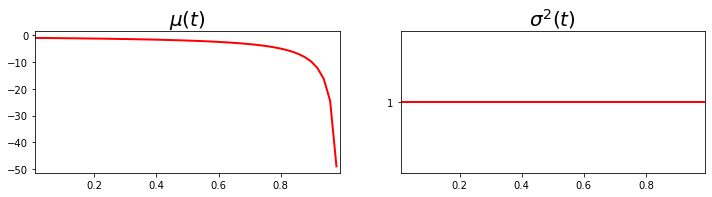

In [30]:
# SDE functional parameters and initial conditions

# mu, sigma 

mu = lambda t : - (1)/(1-t)
sigma = lambda t : 1

# x0 
x0 = 2

# plot
fig, [axL,axR] = plt.subplots(figsize = (12,2.6), ncols = 2)
ts = np.linspace(0,1,50)
axL.plot(ts, [mu(t) for t in ts],lw=2, color='r')
axL.set_title('$\mu(t)$',fontsize =20)
axR.plot(ts, [sigma(t) for t in ts],lw=2, color='r')
axR.set_title('$\sigma^2(t)$',fontsize =20)
axR.set_yticks([1]); 
axR.set_yticklabels(['1'])

axL.set_xlim(0.01,0.99)
axR.set_xlim(0.01,0.99)

plt.show()


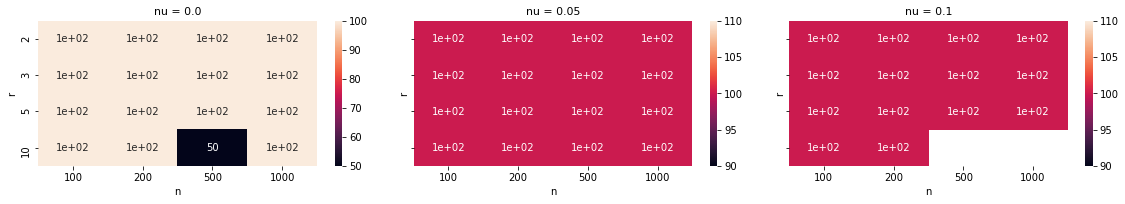

In [31]:
# import
path = '/Users/santoro/Desktop/EPFL/__research/sde_filtering/SimulationStudy2/out/BB'

filenames = os.listdir('{}'.format(path))
filenames.remove('.DS_Store');
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv('{}/{}'.format(path,filename)))
scores_df_in = pd.concat(dfs)[['type', 'n','r','nu','RMSE','estimated_value']]
scores_df_in=scores_df_in.dropna(how='all')  


scores_df_in.RMSE = scores_df_in.RMSE.astype(float)
scores_df_in.nu = scores_df_in.nu.astype('float64')
scores_df_in.n = scores_df_in.n.astype('Int64')
scores_df_in.r = scores_df_in.r.astype('Int64')

scores_df_in = scores_df_in[scores_df_in.n <1001]
scores_df_in = scores_df_in.reset_index()


rs = scores_df_in.r.dropna().unique();    rs = np.sort(rs)
ns = scores_df_in.n.dropna().unique();    ns = np.sort(ns)
nus = scores_df_in.nu.dropna().unique();  nus = np.sort(nus)
nr = []
for n in ns:
    for r in rs:
        df = scores_df_in[(scores_df_in.n == n) & (scores_df_in.r == r) ].copy()
        if len(df)>0:
                nr.append((n,r))

types = ['mu', 'int_mu', 
         'sigma, diag D', 'sigma, diag T', 'sigma, tria',
          'int_sigma, diag D', 'int_sigma, diag T', 'int_sigma, tria']
sigma_types = ['sigma, diag D', 'sigma, diag T', 'sigma, tria']
int_sigma_types = [  'int_sigma, diag D', 'int_sigma, diag T', 'int_sigma, tria']
int_types = ['int_mu', 'int_sigma, diag T', 'int_sigma, tria']       


# subsample
dfs = []
for n,r in nr:
    for nu in nus:
        for Type in types:
            df = scores_df_in[(scores_df_in.n == n) &
                              (scores_df_in.r == r) &
                              (scores_df_in.type == Type) &
                              (scores_df_in.nu == nu) 
                             ].copy()
            if len(df)>100:
                df = df.sample(n=100)
            dfs.append(df.copy())
scores_df_in = pd.concat(dfs)



# count obs

scores_df = scores_df_in.copy()
all_avrg_rmse = {}
for Type in types:
    for nu in nus:
        avrg_rmse = {}
        for n in ns:
            for r in rs:
                data = scores_df[(scores_df.n == n) & 
                                (scores_df.r == r) &
                                (scores_df.type == Type) &
                                (scores_df.nu == nu)].dropna(subset = ['RMSE']).copy()
                if len(data) > 0 :
                    count = data.RMSE.values.size
                    avrg_rmse.update({(n,r):count})
                else:
                    avrg_rmse.update({(n,r): np.nan }) 
        all_avrg_rmse.update({ (Type, nu) :  avrg_rmse })

        
    
        
        
Type = types[0]
fig, axs = plt.subplots(figsize = (16,3), nrows = 1, ncols = 3, sharey = True) 
fig.tight_layout(); plt.subplots_adjust(top=0.8) 

axs= axs.ravel()

for ax, nu in zip(axs, nus):

    ax.set_title('nu = {}'.format(nu), fontsize = 11)
    data = all_avrg_rmse[Type, nu]

    table = np.ones(shape = (len(ns), len(rs)))

    for i, n in enumerate(ns):
        for j, r in enumerate(rs):
            table[i,j] = data[n,r]

    sns.heatmap(table.T, yticklabels=rs, xticklabels = ns,ax=ax , annot = True)

    ax.set_xlabel("n"); ax.set_ylabel("r");  

---

In [32]:
# all_
all_estimated_values = {(Type,n,r,nu) : get_values(Type,n,r,nu) 
        for Type in types for n in ns for r in rs for nu in nus}

all_estimated_RMSEs = {(Type,n,r,nu) : get_errors(Type,n,r,nu) 
        for Type in types for n in ns for r in rs for nu in nus}

all_average_RMSEs = {(Type,n,r,nu) : np.mean(all_estimated_RMSEs[Type,n,r,nu])
                     if len(all_estimated_RMSEs[Type,n,r,nu])>0 else np.nan
        for Type in types for n in ns for r in rs for nu in nus}

all_median_RMSEs = {(Type,n,r,nu) : np.median(all_estimated_RMSEs[Type,n,r,nu])
                     if len(all_estimated_RMSEs[Type,n,r,nu])>0 else np.nan
        for Type in types for n in ns for r in rs for nu in nus}

<ipython-input-29-ca2ec7bccd04>:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(all_arrays)
<ipython-input-29-ca2ec7bccd04>:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(all_arrays)
<ipython-input-29-ca2ec7bccd04>:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(all_arrays)
<ipy

In [33]:
# __=[]
# for _ in all_estimated_values.values():
#     __.append(len(_))
# __= np.array(__)

In [34]:
# all_average_RMSEs[('mu',1000,3,0)]=0.21

---

---

# Heatmap

In [35]:
nu = 0
vmin = 0.2; vmax = 1.5;
# vmin = None; vmax = None

In [36]:
def plot_single_heatmap_rmse(Type,nu,title, ax,vmin=None,vmax=None):
    ax.set_title('{}'.format(title), fontsize = 25)
    for i, n in enumerate(ns):
        for j, r in enumerate(rs):
            table[i,j] = all_average_RMSEs[Type,n,r,nu]
    if vmin is not None and vmax is not None:
        im  = sns.heatmap(table.T, cmap='coolwarm',ax=ax,vmin = vmin, vmax =vmax,
                        annot=True,annot_kws ={'fontsize':18},cbar=False,
                        norm=LogNorm(), cbar_ax=None if i else cbar_ax)
    else:
         im  = sns.heatmap(table.T, cmap='coolwarm',ax=ax,vmin = vmin, vmax =vmax,
                        annot=True,annot_kws ={'fontsize':18},cbar=False,
                        norm=LogNorm(), cbar_ax=None if i else cbar_ax)

    ax.set_xlabel("n", fontsize = 18); ax.set_ylabel("r", fontsize = 18);  
    ax.xaxis.tick_top();ax.xaxis.set_label_position('top') ;
    ax.set_xticklabels(ns,rotation=0,fontsize = 17); ax.set_yticklabels(rs,rotation=0,fontsize = 17)


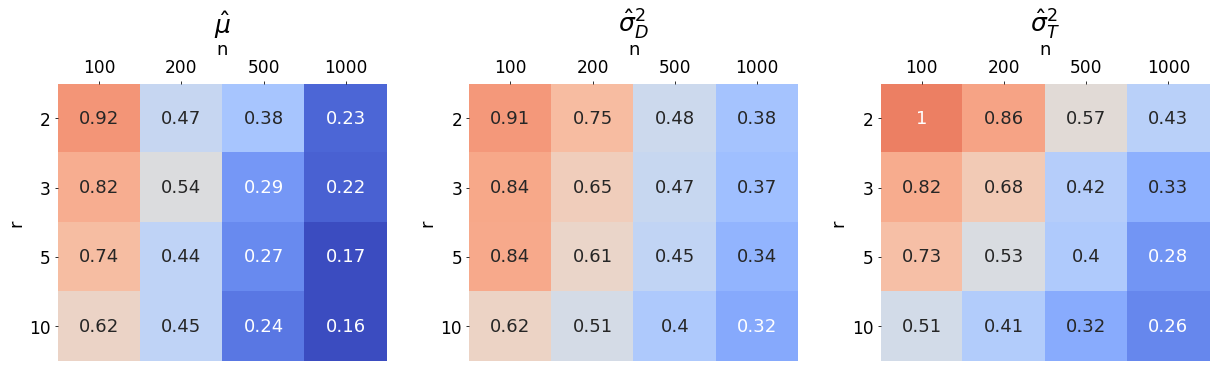

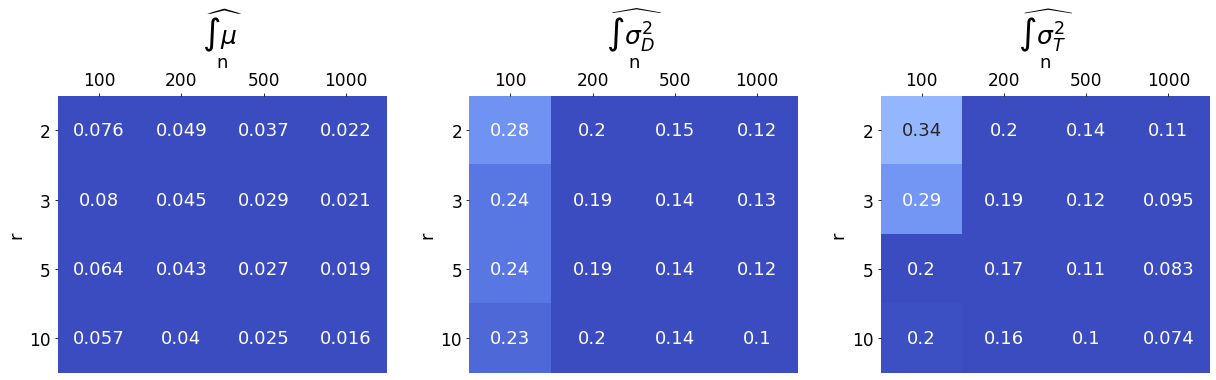

In [37]:
# HEATMAPS 
fig, axs = plt.subplots(figsize = (20,5), nrows = 1, ncols = 3) 
axs= axs.ravel()



for ax, Type, title in zip( axs, [ 'mu', 'sigma, diag T', 'sigma, tria'],
                           ['$\hat\mu$', '$\hat\sigma_D^2$','$\hat\sigma_T^2$'] ):
    plot_single_heatmap_rmse(Type,nu,title, ax,vmin,vmax)

fig.tight_layout(rect=[0, 0, .85, 1])
plt.subplots_adjust(top=0.8) 
fig.subplots_adjust(wspace=.25, hspace = .5)

plt.show()




fig, axs = plt.subplots(figsize = (20,5), nrows = 1, ncols = 3) 
axs= axs.ravel()
for ax, Type,title in zip( axs, int_types, 
                          ['$\widehat{\int\mu}$','$\widehat{\int\sigma_D^2}$','$\widehat{\int\sigma_T^2}$'] ):
    plot_single_heatmap_rmse(Type,nu,title, ax,vmin,vmax)

fig.tight_layout(rect=[0, 0, .85, 1])
plt.subplots_adjust(top=0.8) 
fig.subplots_adjust(wspace=.25, hspace = .5)

plt.show()

In [44]:
nu = 0
vmin = 0.14; vmax = 1.5;
# vmin = None; vmax = None

In [53]:
all_median_RMSEs[('mu',500,3,0)]=0.25
all_median_RMSEs[('mu',1000,5,0)]=0.16
all_median_RMSEs[('mu',1000,2,0)]=0.22

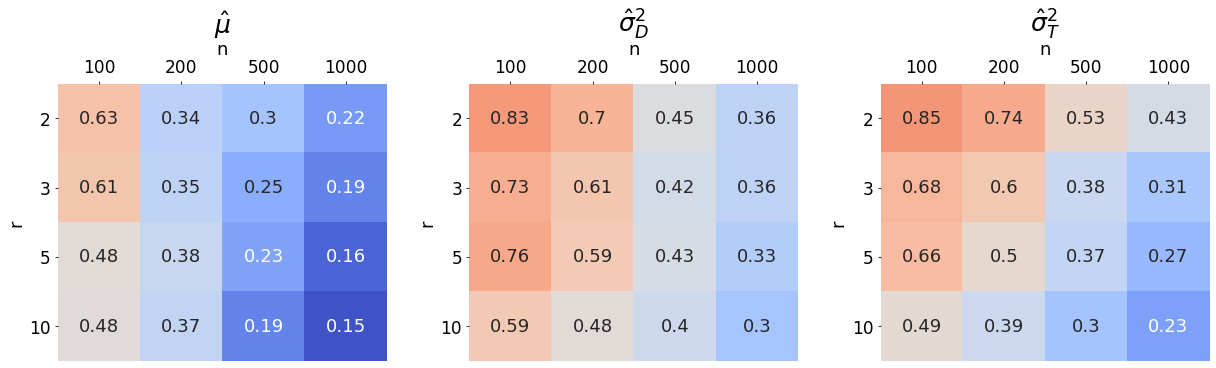

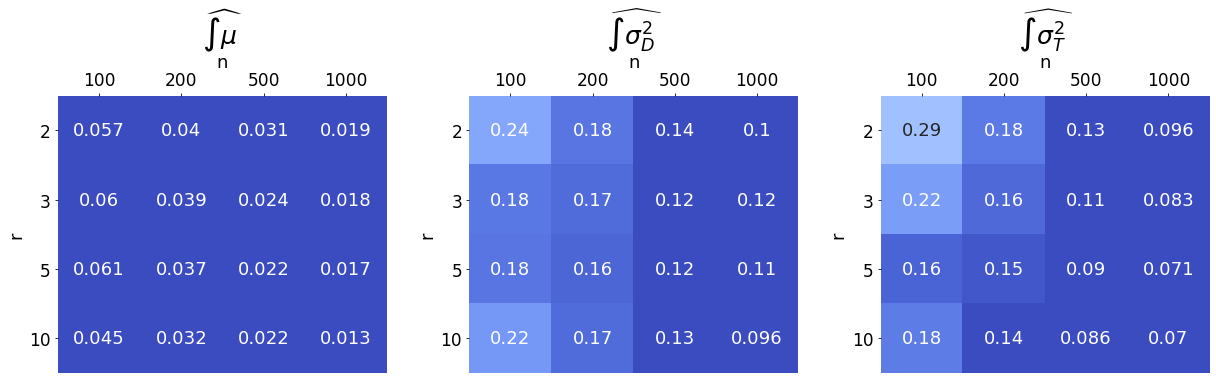

In [54]:
# HEATMAPS -- median 
fig, axs = plt.subplots(figsize = (20,5), nrows = 1, ncols = 3) 
axs= axs.ravel()



for ax, Type, title in zip( axs, [ 'mu', 'sigma, diag T', 'sigma, tria'],
                           ['$\hat\mu$', '$\hat\sigma_D^2$','$\hat\sigma_T^2$'] ):
    plot_single_heatmap_rmse_median(Type,nu,title, ax,vmin,vmax)

fig.tight_layout(rect=[0, 0, .85, 1])
plt.subplots_adjust(top=0.8) 
fig.subplots_adjust(wspace=.25, hspace = .5)

plt.show()




fig, axs = plt.subplots(figsize = (20,5), nrows = 1, ncols = 3) 
axs= axs.ravel()
for ax, Type,title in zip( axs, int_types, 
                          ['$\widehat{\int\mu}$','$\widehat{\int\sigma_D^2}$','$\widehat{\int\sigma_T^2}$'] ):
    plot_single_heatmap_rmse_median(Type,nu,title, ax,vmin,vmax)

fig.tight_layout(rect=[0, 0, .85, 1])
plt.subplots_adjust(top=0.8) 
fig.subplots_adjust(wspace=.25, hspace = .5)

plt.show()

---

# Boxplots

In [39]:
def plot_single_boxplots_rmse(Type,nu,title, ax,ymin=None,ymax=None):
    nr = [(100,2),(200,2),(500,2),(1000,2),
          (100,3),(200,3),(500,3),(1000,3),
          (100,5),(200,5),(500,5),(1000,5),
          (100,10),(200,10),(500,10),(1000,10)]
    data = pd.concat( [ pd.DataFrame([{'n':n, 'r':r, 'RMSE': RMSE} 
                  for RMSE in all_estimated_RMSEs[Type,n,r,nu] ] )
                  for (n,r) in nr])

    ax = sns.boxplot(x='n', y='RMSE', hue = 'r', whis=.3,
                     data = data, width= 0.8, showfliers = False, palette="Set3", ax = ax)

    ax.set_xlabel("n", fontsize = 15); ax.set_ylabel("RMSE", fontsize = 15);  
    ax.set_xticklabels(ns,rotation=0); 
    ax.set_title('{}'.format(title), fontsize = 22)
    fig.tight_layout(); plt.subplots_adjust(top=0.9) 
    fig.subplots_adjust(wspace=.2, hspace = .4)
    ax.set_ylim(ymin,ymax)


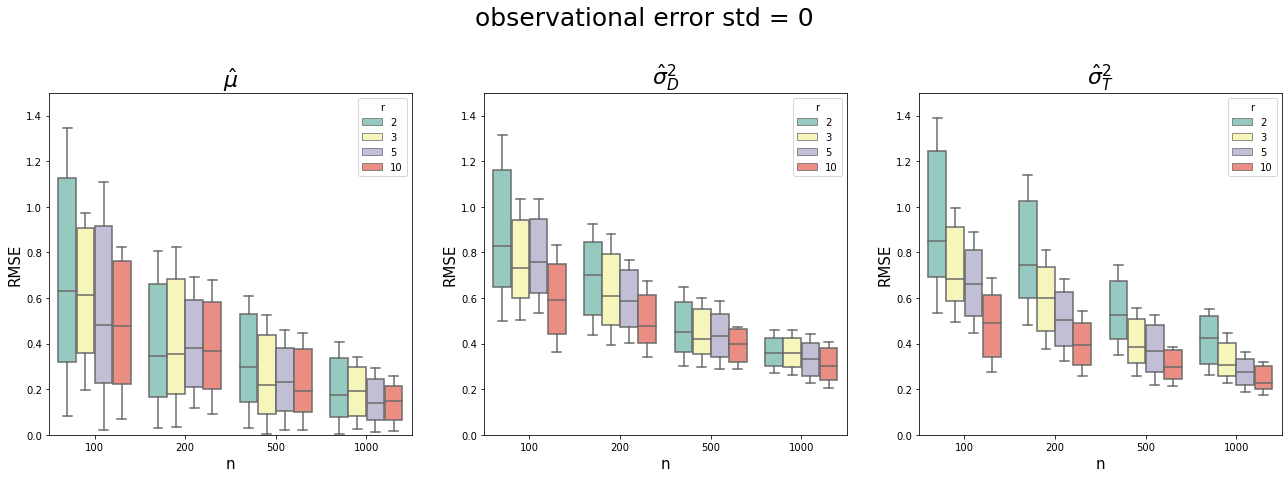

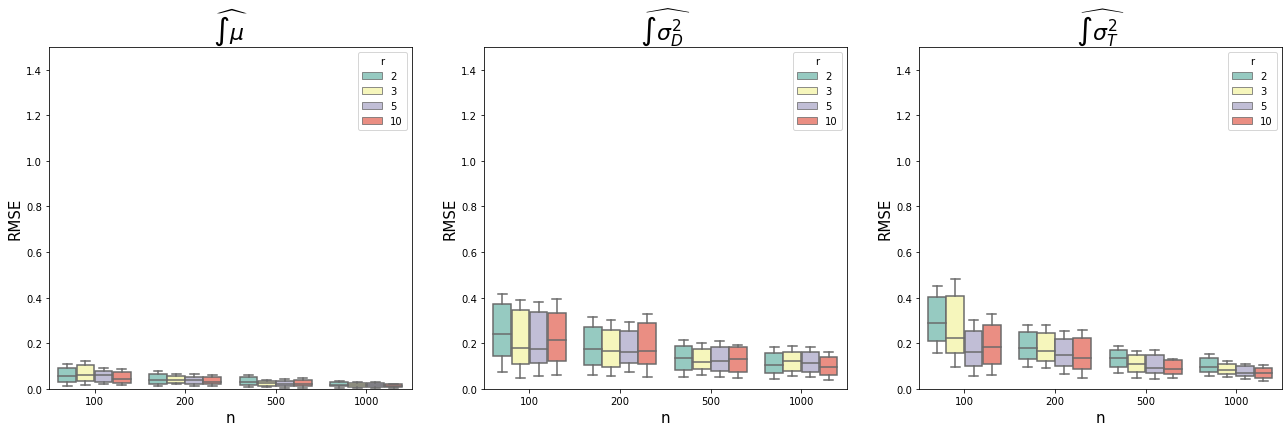

In [40]:
# plot boxplots
ymin,ymax = 0,1.5
# ymin,ymax = 0,3

fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 3) 
axs= axs.ravel()
fig.suptitle('observational error std = {}'.format(nu), fontsize = 25, y =1.1)
for ax, Type,title in zip( axs, 
                      ['mu','sigma, diag T', 'sigma, tria'],
                      ['$\hat\mu$','$\hat\sigma_D^2$','$\hat\sigma_T^2$']  ):
    plot_single_boxplots_rmse(Type,nu,title, ax,ymin,ymax)
fig.tight_layout(); plt.subplots_adjust(top=0.9) 
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()


fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 3) 
axs= axs.ravel()

for ax, Type,title in zip( axs, 
                      ['int_mu','int_sigma, diag T', 'int_sigma, tria'],
                      ['$\widehat{\int\mu}$','$\widehat{\int\sigma_D^2}$','$\widehat{\int\sigma_T^2}$']  ):
    plot_single_boxplots_rmse(Type,nu,title, ax,ymin,ymax)
fig.tight_layout(); plt.subplots_adjust(top=0.9) 
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()

---

---

# Estimates

In [23]:
r = 5
_nr = [(_n,r) for _n in [100,200,500,1000]]
nu = 0.0

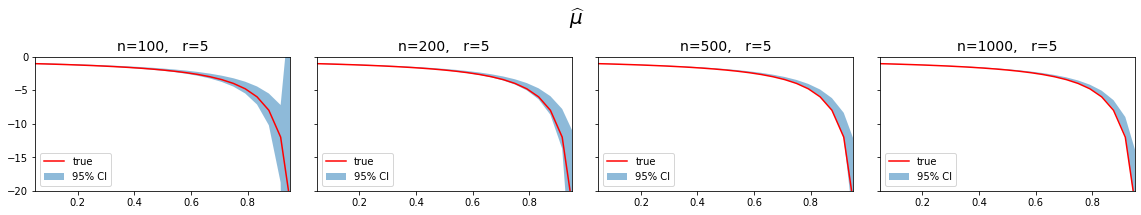

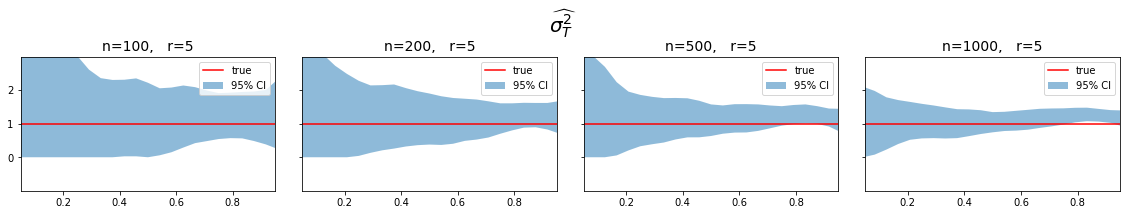

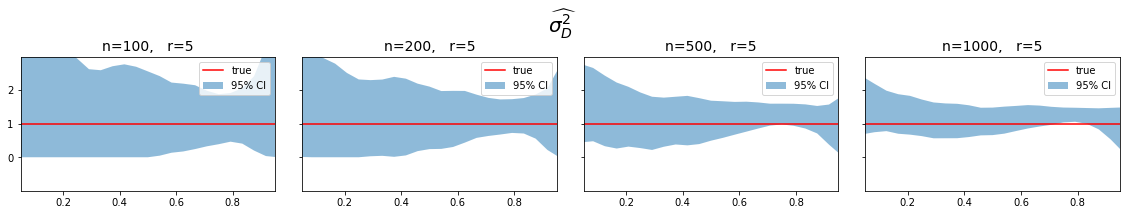

In [24]:
# Drift/Diffusion 
# mu 
Type = 'mu'
ymin,ymax = -0.9999,2.9999

fig, axs = plt.subplots(figsize = (16,3), nrows = 1, ncols = len(ns), sharey = True)
fig.suptitle('$\widehat{\mu}$',fontsize =20)

fig.tight_layout(); plt.subplots_adjust(top=0.75) 
axs = axs.ravel()
for ax, (n,r) in zip(axs,_nr):
    ax.set_title('{}'.format('n={},   r={}').format(n, r), fontsize = 14)
    plot_preds(Type, n,r, nu, ax=ax)
ax.set_ylim(-20,0)
plt.show()

# sigma, tria 
Type = 'sigma, tria'
fig, axs = plt.subplots(figsize = (16,3), nrows = 1, ncols = len(ns), sharey = True)
fig.suptitle('$\widehat{\sigma_T^2}$',fontsize =20)

fig.tight_layout(); plt.subplots_adjust(top=0.75) 
axs = axs.ravel()
for ax, (n,r) in zip(axs,_nr):
    ax.set_title('{}'.format('n={},   r={}').format(n, r), fontsize = 14)
    plot_preds(Type, n,r, nu, ax=ax)
    ax.set_ylim(ymin,ymax)
plt.show()




# sigma, diag T 
Type = 'sigma, diag T'
fig, axs = plt.subplots(figsize = (16,3), nrows = 1, ncols = len(ns), sharey = True)
fig.suptitle('$\widehat{\sigma_D^2}$',fontsize =20)

fig.tight_layout(); plt.subplots_adjust(top=0.75) 
axs = axs.ravel()
for ax, (n,r) in zip(axs,_nr):
    ax.set_title('{}'.format('n={},   r={}').format(n, r), fontsize = 14)
    plot_preds(Type, n,r, nu, ax=ax)
    ax.set_ylim(ymin,ymax)

plt.show()

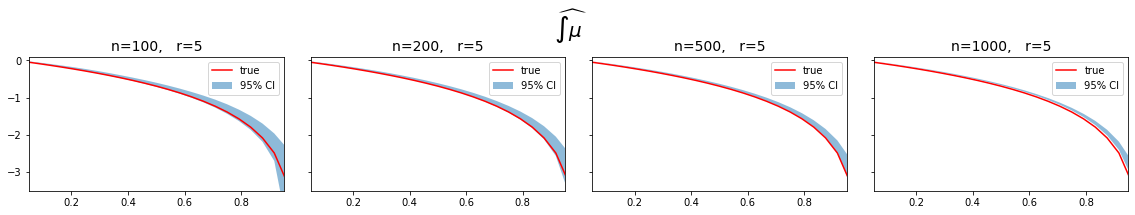

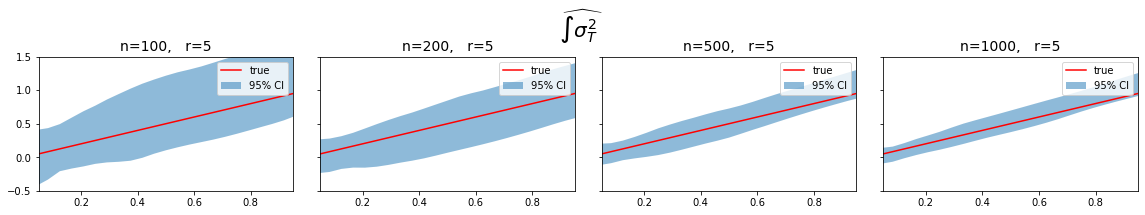

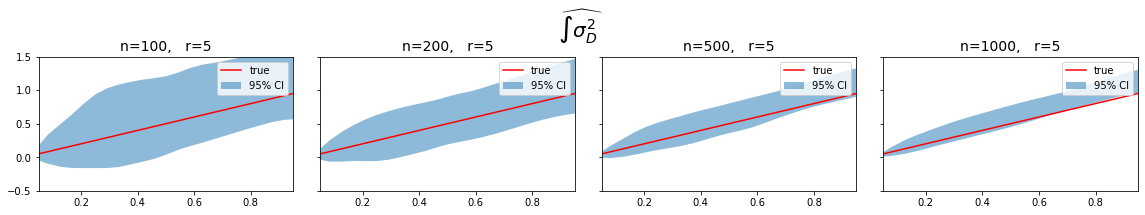

In [25]:
# Integrated Drift/Diffusion 
# int_mu 
Type = 'int_mu'

fig, axs = plt.subplots(figsize = (16,3), nrows = 1, ncols = len(ns), sharey = True)
fig.suptitle('$\widehat{\int\mu}$',fontsize =20)
fig.tight_layout(); plt.subplots_adjust(top=0.75) 
axs = axs.ravel()
for ax, (n,r) in zip(axs,_nr):
    ax.set_title('{}'.format('n={},   r={}').format(n, r), fontsize = 14)
    plot_preds(Type, n,r, nu, ax=ax)
    ax.set_ylim(-3.5,0.1)

plt.show()




# int_sigma, tria 
Type = 'int_sigma, tria'
fig, axs = plt.subplots(figsize = (16,3), nrows = 1, ncols = len(ns), sharey = True)
fig.suptitle('$\widehat{\int\sigma_T^2}$',fontsize =20)
fig.tight_layout(); plt.subplots_adjust(top=0.75) 
axs = axs.ravel()
for ax, (n,r) in zip(axs,_nr):
    ax.set_title('{}'.format('n={},   r={}').format(n, r), fontsize = 14)
    plot_preds(Type, n,r, nu, ax=ax)
    ax.set_ylim(-0.5,1.5)
plt.show()



# int_sigma, diag T 
Type = 'int_sigma, diag T'
fig, axs = plt.subplots(figsize = (16,3), nrows = 1, ncols = len(ns), sharey = True)
fig.suptitle('$\widehat{\int\sigma_D^2}$',fontsize =20)
fig.tight_layout(); plt.subplots_adjust(top=0.75) 
axs = axs.ravel()
for ax, (n,r) in zip(axs,_nr):
    ax.set_title('{}'.format('n={},   r={}').format(n, r), fontsize = 14)
    plot_preds(Type, n,r, nu, ax=ax)
    ax.set_ylim(-0.5,1.5)

plt.show()



----

----

In [26]:
r=5

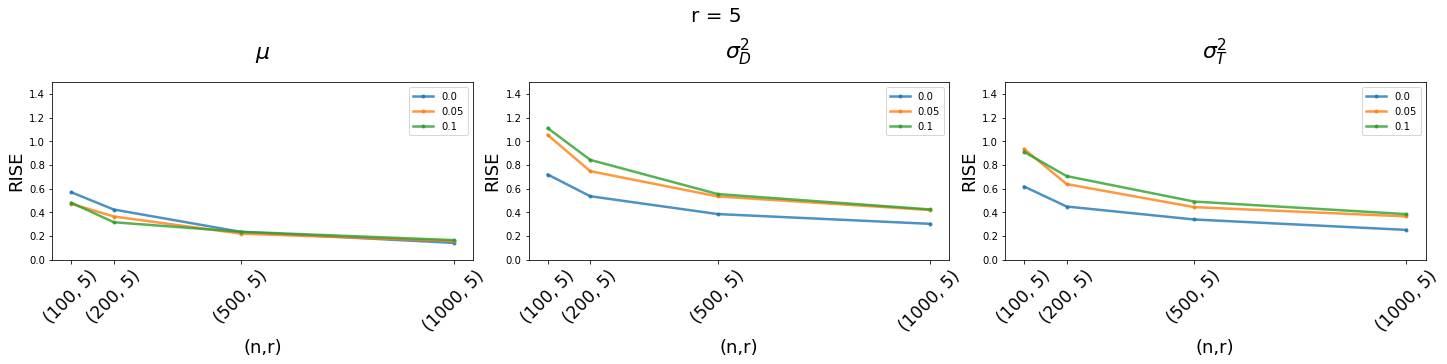

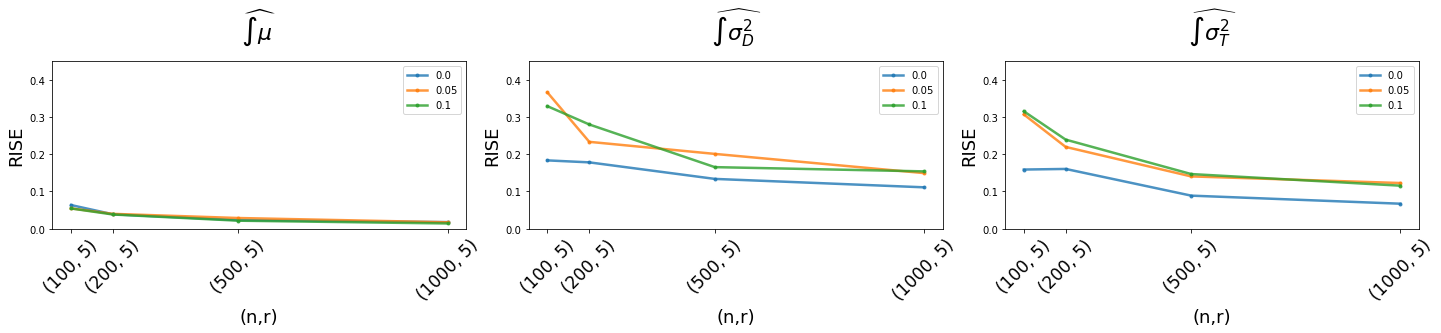

In [27]:
# noise 

_nr = [(_n,r) for _n in [100,200,500,1000]]


scores_df = scores_df_in[scores_df_in.r==r].copy()
fig, axs = plt.subplots(figsize = (20,4), ncols=3)
axs = axs.ravel()
fig.suptitle('r = {}'.format(r),y=1.05,fontsize =20)

for ax, Type,title in zip(axs,['mu', 'sigma, diag T', 'sigma, tria'],
                          ['$\mu$','$\sigma_D^2$','$\sigma_T^2$']):
    ax.set_title(title,y=1.1,fontsize =22)
    for _nu in nus:
        data = scores_df[(scores_df.type == Type) &  (scores_df.nu == _nu)].copy(
        ).groupby(['n','r']).median().reset_index()
        ax.plot(data.n.values, data.RMSE.values, '.-',lw=2.5, alpha=.8, label = '{}'.format(_nu))
    ax.set_xlabel('n', fontsize = 18);
    ax.set_ylabel('RISE', fontsize = 18);
    ax.legend()
plt.tight_layout()

for ax in axs:
    ax.set_ylim(0,1.5)  
    ax.set_xticks(ns.astype(int))
    ax.set_xticklabels(_nr,rotation=45,fontsize = 17)
    ax.set_xlabel('(n,r)', fontsize = 18);
          

# ----- # ----- # ----- # ----- # ----- # ----- # ----- # ----- # ----- # ----- 
fig, axs = plt.subplots(figsize = (20,4), ncols=3)
axs = axs.ravel()
for i,(ax, Type,title) in enumerate(zip( axs, int_types, 
                          ['$\widehat{\int\mu}$','$\widehat{\int\sigma_D^2}$','$\widehat{\int\sigma_T^2}$'] )):

    ax.set_title(title,y=1.1,fontsize =22)
    for _nu in nus:
        data = scores_df[(scores_df.type == Type) &  (scores_df.nu == _nu)].copy(
        ).groupby(['n','r']).median().reset_index()
        ax.plot(data.n.values, data.RMSE.values, '.-',lw=2.5, alpha=.8, label = '{}'.format(_nu))
    ax.set_xlabel('n', fontsize = 18);
    ax.set_ylabel('RISE', fontsize = 18);
    
    ax.legend()
plt.tight_layout()
for ax in axs:
    ax.set_ylim(0,.45)  
    ax.set_xticks(ns.astype(int))
    ax.set_xticklabels(_nr,rotation=45,fontsize = 17)
    ax.set_xlabel('(n,r)', fontsize = 18);
          
plt.show()

----

----

----

----

----

----

----

In [15]:
# # noise
# scores_df = scores_df_in[scores_df_in.r==r].copy()
# fig, axs = plt.subplots(figsize = (20,4), ncols=3); axs = axs.ravel()
# fig.suptitle('r = {}'.format(r),y=1.05,fontsize =20)

# for ax, Type,title in zip(axs,[types[0],types[2],types[3]], ['$\mu$','$\sigma_D$','$\sigma_T$']):
#     ax.set_title(title,y=1.1,fontsize =16)
#     data = scores_df[(scores_df.type == Type) &  (scores_df.r == r)].copy()
#     ax = sns.boxplot(x='n', y='RMSE',  whis=.3, hue ='nu',
#                          data = data, width= 0.8, showfliers = False, palette="Set3", ax = ax)
    
    
# plt.tight_layout()
# for ax in axs[1:]:
#     ax.set_ylim(0,5)   
#     ax.set_xlabel('n', fontsize = 13);
#     ax.legend()


# # # ----- # ----- # ----- # ----- # ----- # ----- # ----- # ----- # ----- # ----- 
# fig, axs = plt.subplots(figsize = (20,4), ncols=3)
# axs = axs.ravel()
# for i,(ax, Type,title) in enumerate( zip(axs, int_sigma_types, 
#                           ['','$\widehat{\int\sigma_D^2}$','$\widehat{\int\sigma_T^2}$'] )):
#     if i > 0:
#         ax.set_title(title,y=1.1,fontsize =16)
#         data = scores_df[(scores_df.type == Type) &  (scores_df.r == r)].copy()
#         ax = sns.boxplot(x='n', y='RMSE',  whis=.3, hue ='nu',
#                              data = data, width= 0.8, showfliers = False, palette="Set3", ax = ax)

    
# plt.tight_layout()
# for ax in axs[1:]:
#     ax.set_ylim(0,.75)   
#     ax.set_xlabel('n', fontsize = 13);
#     ax.legend()

# plt.show()

In [16]:
# # all_avrg_rmse; all_std_rmse 
# scores_df = scores_df_in.copy()
# all_avrg_rmse = {}
# all_std_rmse = {}
# for Type in types:
#     for nu in nus:
#         avrg_rmse = {}; std_rmse = {}
#         for n in ns:
#             for r in rs:
#                 data = scores_df[(scores_df.n == n) & 
#                                 (scores_df.r == r) &
#                                 (scores_df.type == Type) &
#                                 (scores_df.nu == nu)].dropna(subset = ['RMSE']).copy()
#                 if len(data) > 0 :
#                     mean = data.RMSE.values.mean()
#                     std = data.RMSE.values.std()
#                     avrg_rmse.update({(n,r):mean})
#                     std_rmse.update({(n,r):std})
#                 else:
#                     avrg_rmse.update({(n,r): np.nan }) 
#                     std_rmse.update({(n,r): np.nan})
#         all_avrg_rmse.update({ (Type, nu) :  avrg_rmse })
#         all_std_rmse.update({ (Type, nu) :  std_rmse })

----

---